In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('loan_data_set.csv')

In [3]:

# Loan_ID           : Unique Loan ID

# Gender            : Male/ Female

# Married           : Applicant married (Y/N)

# Dependents        : Number of dependents

# Education         : Applicant Education (Graduate/ Under Graduate)

# Self_Employed     : Self employed (Y/N)

# ApplicantIncome   : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount        : Loan amount in thousands of dollars

# Loan_Amount_Term  : Term of loan in months

# Credit_History    : Credit history meets guidelines yes or no

# Property_Area     : Urban/ Semi Urban/ Rural

# Loan_Status       : Loan approved (Y/N) this is the target variable

# simple look on the data

In [4]:
df.shape

(614, 13)

In [5]:
df.head()

# fot just an overview of the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

# We have missing data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()
# Give stats of only the numerical data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# # we change the type of Credit_History to object becaues we can see that it is 1 or 0

# df['Credit_History'] = df['Credit_History'].astype('O')

In [9]:
# Give stats of categorical data ("objec")

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
#  drop the  ID because it's not important for our model

df.drop('Loan_ID', axis=1, inplace=True)

In [11]:
df.duplicated().any()

# we do not have duplicated rows

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


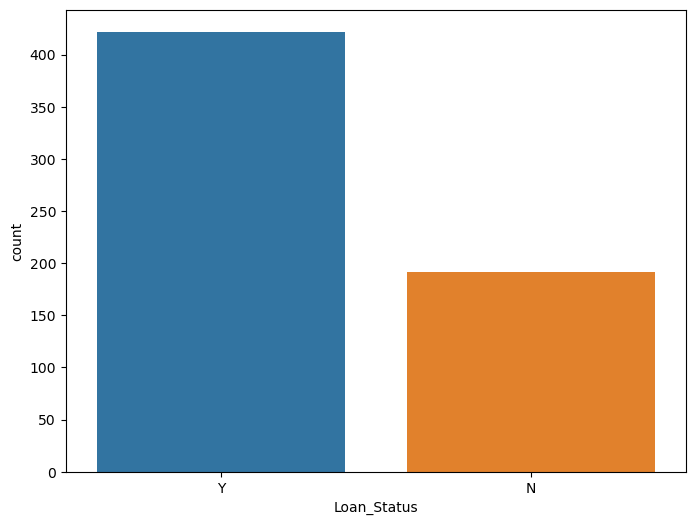

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# this is an bit  imbalanced data

# let's look deeper in the data

In [13]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### first we will go through the categorical features


In [14]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


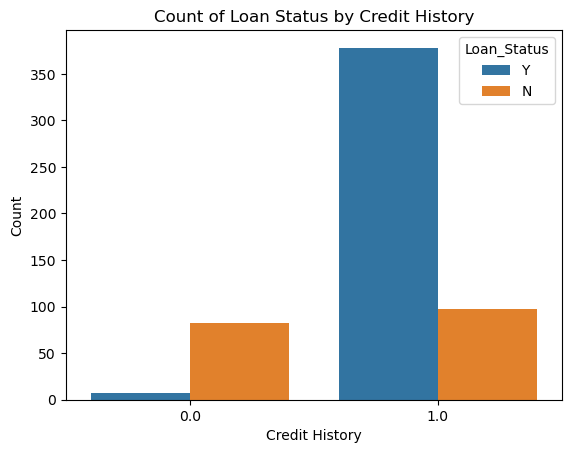

In [15]:
# Credit_History

sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Count of Loan Status by Credit History')

plt.show()

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1


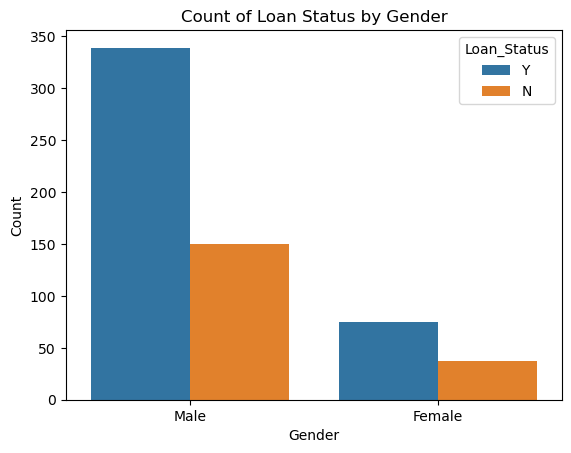

In [16]:
# Gender

sns.countplot(data=df, x='Gender', hue='Loan_Status')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Loan Status by Gender')

plt.show()

# most males got loan and most females got one too so , no info

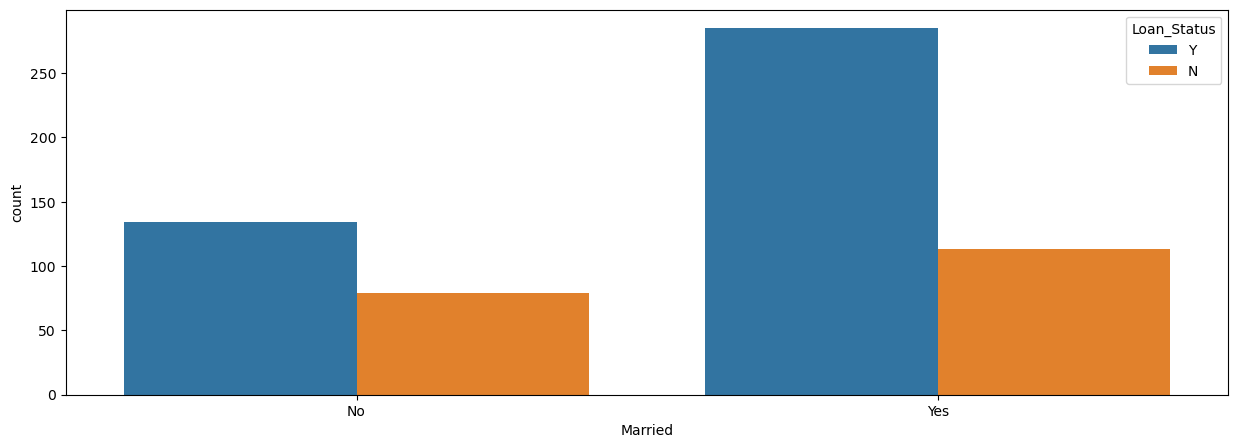

In [17]:
# Married

plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

# most people who get married did get a loan
# good feature

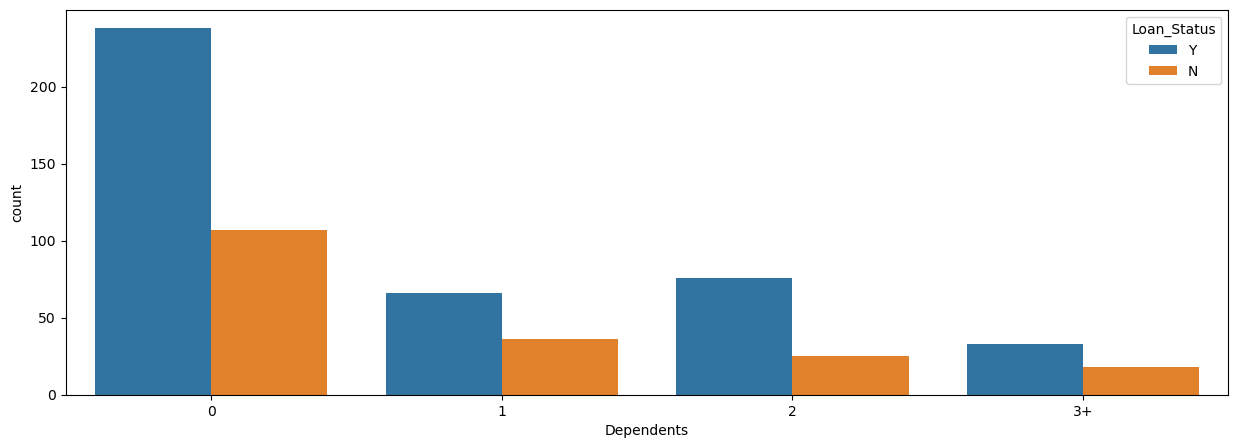

In [18]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

#  Dependents = 0 , has  higher chance to get a loan 
# good feature

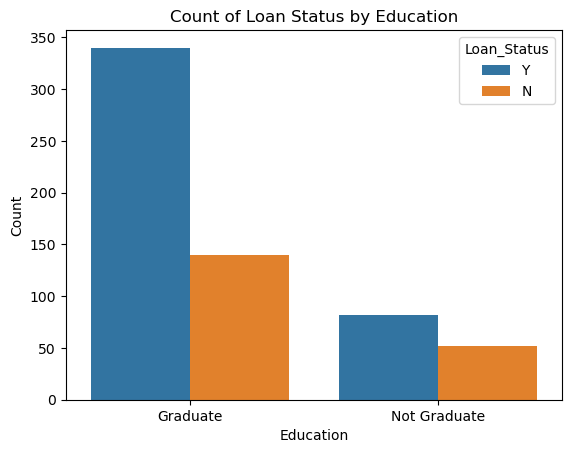

In [19]:
# Education

sns.countplot(data=df, x='Education', hue='Loan_Status')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Loan Status by Education')

plt.show()

# If you are graduated or not, you will get almost the same chance to get a loan , no info

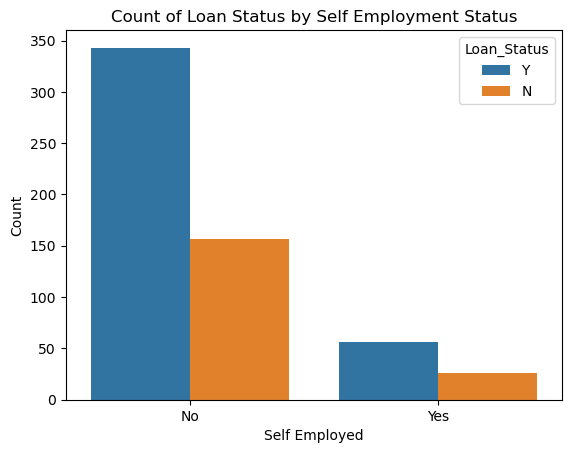

In [20]:
# Self_Employed

sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Count of Loan Status by Self Employment Status')

plt.show()


# No info

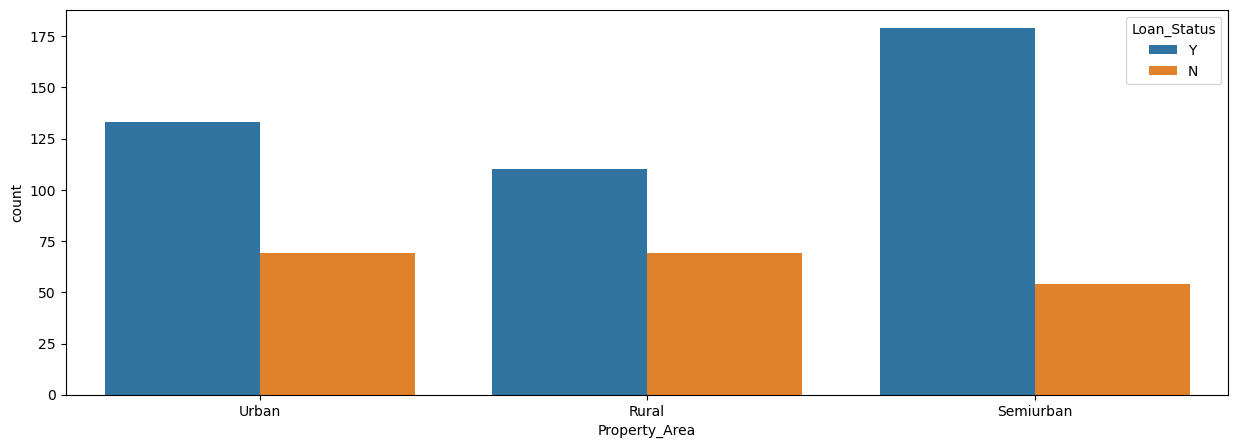

In [21]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

# Simple process for the data

### Missing values

here i am just going to use a simple techniques to handle the missing data

In [22]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
# We jus separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [24]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [25]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [26]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [27]:
# cat_data
# fill missing value mode

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()  

False

In [28]:
# num_data
# fill missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() 

False

# categorical columns



In [29]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [30]:
# transform the target column

target_values = {'Y': 1 , 'N' : 0}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [31]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [32]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [33]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2


In [34]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1


# Split the data in Train and Split

In [36]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  # Split the dataset into training and testing sets



# Train  the model

# Logistic Regression using Grid Search method

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train)

y_pred = logistic_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")


Accuracy: 79.67479674796748 %


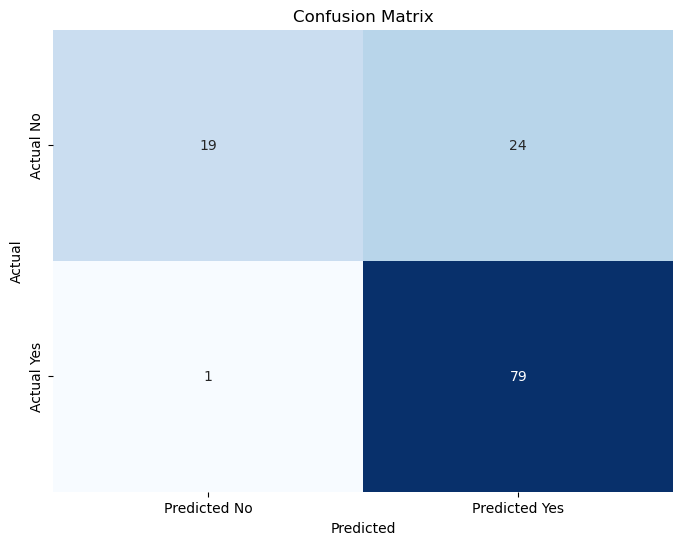

In [38]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred,average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.7669902912621359
Recall: 0.9875
F1-Score: 0.8633879781420766


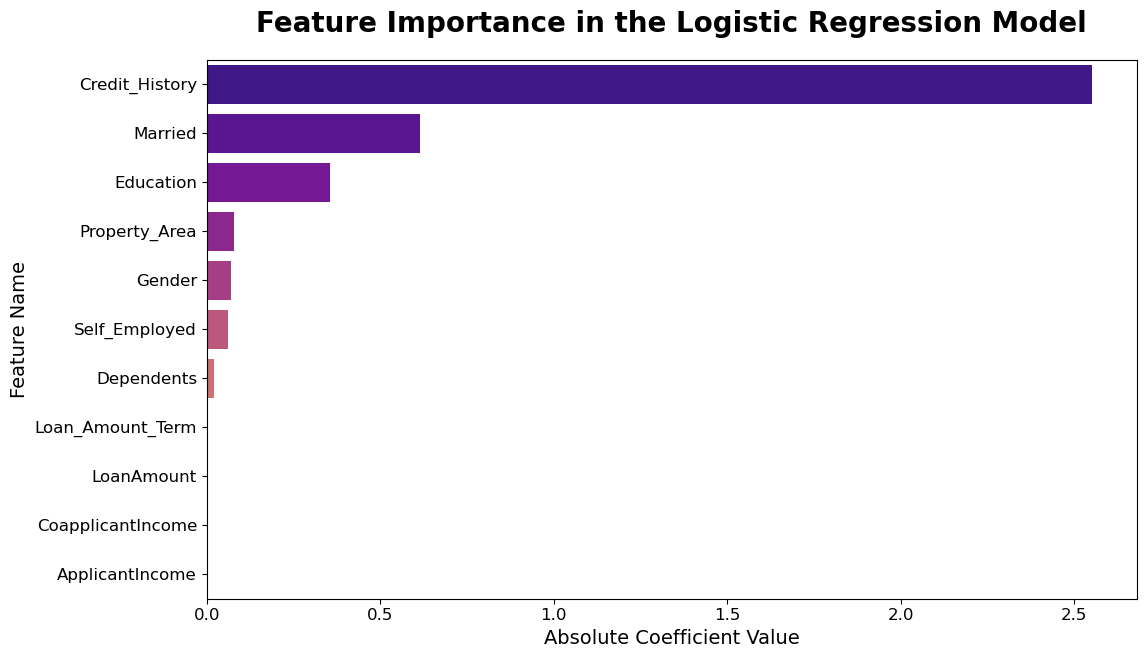

In [40]:
coefficients = logistic_reg.coef_[0]

imp_df = pd.DataFrame({"Feature Name": x_train.columns, "Coefficient": coefficients})
imp_df['Abs_Coefficient'] = imp_df['Coefficient'].abs()
features = imp_df.sort_values(by="Abs_Coefficient", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Abs_Coefficient", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Logistic Regression Model", fontweight="bold", size=20, pad=20)
plt.xlabel("Absolute Coefficient Value", size=14)
plt.ylabel("Feature Name", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy*100,"%")

Random Forest Classifier Accuracy: 78.04878048780488 %


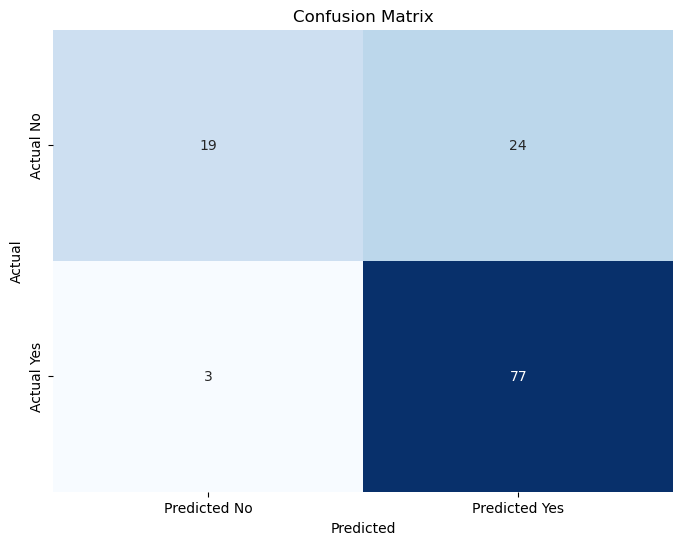

In [42]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [43]:

precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.7623762376237624
Recall: 0.9625
F1-Score: 0.8508287292817679


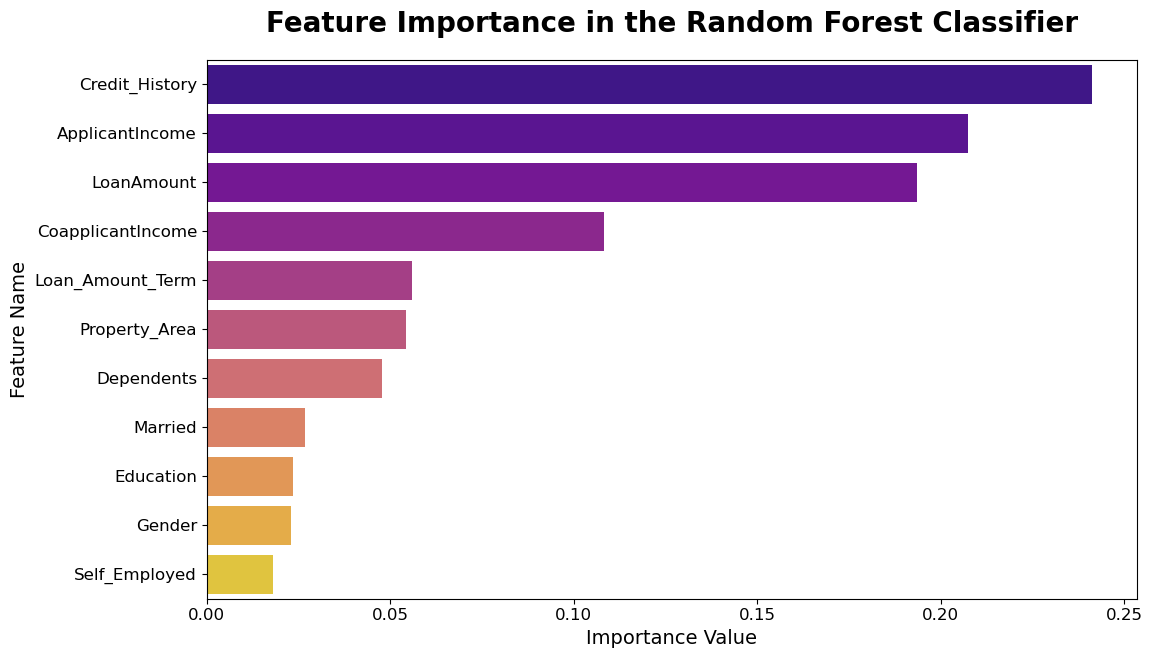

In [44]:

importances = random_forest.feature_importances_

imp_df = pd.DataFrame({"Feature Name": x_train.columns, "Importance": importances})

features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Random Forest Classifier", fontweight="bold", size=20, pad=20)
plt.xlabel("Importance Value", size=14)
plt.ylabel("Feature Name", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


The Logistic Regression has given us 79 percent accuracy.The model is working good

 